## Zadanie 1

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def of(I_org, I, J, W2=3, dy=3, dx=3):
    (Y,X) = I.shape
    u,v = np.zeros((Y,X)), np.zeros((Y,X))

    for j in range(W2,Y-W2):
        for i in range(W2,X-W2):
            I0 = np.float32(I[j-W2:j+W2+1,i-W2:i+W2+1])
            min_dist = float("inf")
            best_dx, best_dy = 0, 0
            for y in range(-dy,dy+1):
                for x in range(-dx,dx+1):
                    if (j + y - W2 >= 0) and (j + y + W2 < Y) and (i + x - W2 >= 0) and (i + x + W2 < X):
                        J0 = np.float32(J[j+y-W2:j+y+W2+1,i+x-W2:i+x+W2+1])
                        dist = np.sqrt(np.sum(np.square(J0 - I0)))
                        if dist < min_dist:
                            min_dist = dist
                            best_dx, best_dy = x, y
            u[j,i] = best_dx
            v[j,i] = best_dy

    return u,v

def vis_flow(u, v, YX, name):
    mag, ang = cv2.cartToPolar(u, v)
    hsv = np.zeros((u.shape[0], u.shape[1], 3), dtype=np.uint8)
    hsv[..., 0] = ang * 90 / np.pi
    hsv[..., 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    hsv[..., 2] = 255
    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    plt.imshow(flow_rgb)
    plt.grid(False)
    plt.axis("off")
    plt.title("RGB Flow")
    plt.show()

    plt.quiver(u, v)
    plt.grid(False)
    plt.axis("off")
    plt.gca().invert_yaxis()
    plt.show()

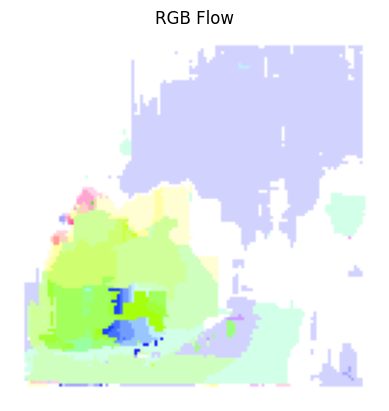

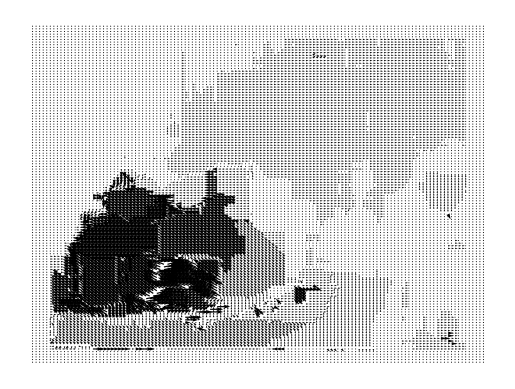

In [23]:
I = cv2.imread("cm1.png")
I = cv2.resize(I,(0,0), fx=0.5, fy=0.5)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

J = cv2.imread("cm2.png")
J = cv2.resize(J,(0,0), fx=0.5, fy=0.5)
J = cv2.cvtColor(J, cv2.COLOR_BGR2GRAY)
u,v = of(I,I,J,5,5,5)

vis_flow(u,v,I,0)

## Zadanie 2

In [ ]:
def pyramid(im, max_size):
    images = [im]
    for k in range(1, max_size):
        images.append(cv2.resize(images[k-1],(0,0), fx=0.5, fy=0.5))
    return images


def multilayer_of(I_org, I, J, scales=3, W2=3, dY=3, dX=3):
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    J = cv2.cvtColor(J, cv2.COLOR_BGR2GRAY)
    I_org = cv2.cvtColor(I_org, cv2.COLOR_BGR2GRAY)

    I_pyramid = pyramid(I, scales)
    J_pyramid = pyramid(J, scales)

    h, w = I_pyramid[-1].shape
    u_total = np.zeros((h, w), dtype=np.float32)
    v_total = np.zeros((h, w), dtype=np.float32)

    for s in range(scales - 1, -1, -1):
        I_curr, J_curr = I_pyramid[s], J_pyramid[s]
        
        u, v = of(I_org, I_curr, J_curr, W2, dY, dX)

        if s < scales - 1:
            u_total = cv2.resize(u_total * 2, (I_curr.shape[1], I_curr.shape[0]), interpolation=cv2.INTER_LINEAR)
            v_total = cv2.resize(v_total * 2, (I_curr.shape[1], I_curr.shape[0]), interpolation=cv2.INTER_LINEAR)

        u_total += u
        v_total += v

    return u_total, v_total

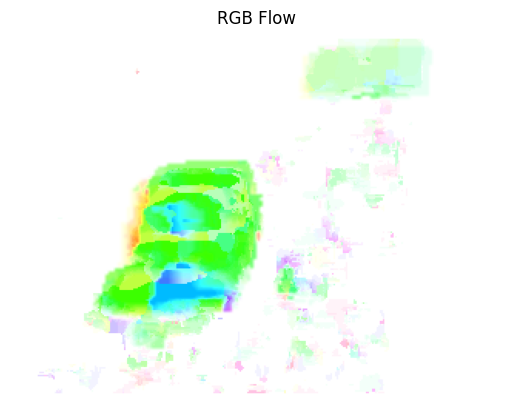

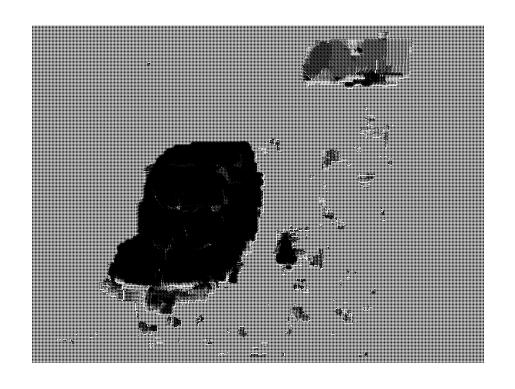

In [29]:
I = cv2.imread("I.jpg")
J = cv2.imread("J.jpg")

u, v = multilayer_of(I,I,J,2,5,5,5)
vis_flow(u,v,0,0)

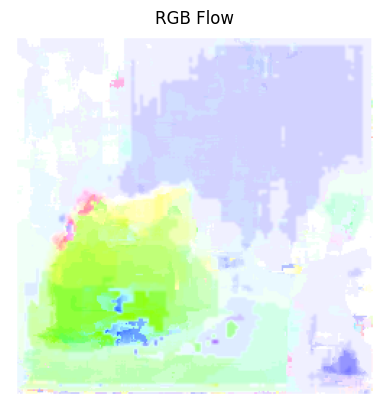

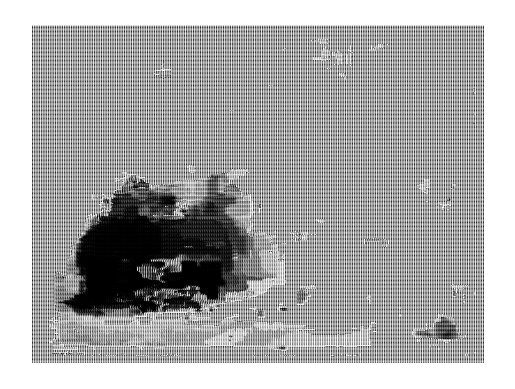

In [31]:
I = cv2.imread("cm1.png")
J = cv2.imread("cm2.png")

u, v = multilayer_of(I,I,J,2,5,5,5)
vis_flow(u,v,0,0)